In [28]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input , Flatten ,Reshape,Dense

In [29]:
from tensorflow.keras.datasets import mnist

In [30]:
import  numpy as np

In [31]:
import matplotlib.pyplot as plt

In [32]:
(x_train, y_train), (x_test, y_test)=mnist.load_data()

In [18]:
x_train.shape

(60000, 28, 28)

In [56]:
inlayer=Input(shape=(28,28))
flat=Flatten()(inlayer)
d1=Dense(units=400,activation="linear")(flat)
d1=Dense(units=50,activation="linear")(d1)
d1=Dense(units=400,activation="linear")(d1)
d1=Dense(units=784,activation="linear")(d1)
output_layer=Reshape(target_shape=(28,28))(d1)

In [57]:
model=Model(inputs=inlayer,outputs=output_layer)

In [58]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_19 (Dense)             (None, 50)                20050     
_________________________________________________________________
dense_20 (Dense)             (None, 400)               20400     
_________________________________________________________________
dense_21 (Dense)             (None, 784)               314384    
_________________________________________________________________
reshape_3 (Reshape)          (None, 28, 28)            0   

In [59]:
model.compile(optimizer='adam',loss="mse")

In [60]:
model.fit(x_train,x_train,epochs=1)

Train on 60000 samples
60000/60000 [==============================] - 12s 195us/sample - loss: 965.9239


In [61]:
out=model.predict(x_test[:5])

In [62]:
out.shape

(5, 28, 28)

In [67]:
#out=out-out.min()
#out=out/out.max()

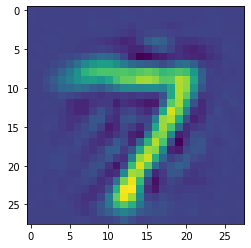

In [69]:
plt.imshow(out[0])

In [70]:
model.layers

In [76]:
encoders=Model(inputs=model.input , outputs=model.layers[3].output)

In [77]:
encoders.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_12 (InputLayer)        [(None, 28, 28)]          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 400)               314000    
_________________________________________________________________
dense_19 (Dense)             (None, 50)                20050     
Total params: 334,050
Trainable params: 334,050
Non-trainable params: 0
_________________________________________________________________


In [78]:
encoders.predict(x_test).shape

(10000, 50)

In [79]:
x_test.shape

(10000, 28, 28)

In [83]:
out=encoders.predict(x_test[:5])

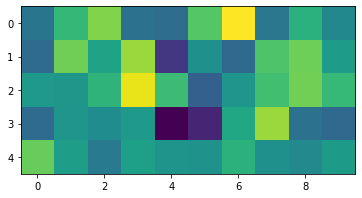

In [88]:
plt.imshow(out[0].reshape(5,10))